In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gzip
from scipy import stats

In [3]:
with gzip.open('data/listings.csv.gz', 'rb') as f:
     df = pd.read_csv(f, index_col = 0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2318,https://www.airbnb.com/rooms/2318,20190209052057,2019-02-09,Casa Madrona -Urban Oasis! *Discount all of Feb*!,"Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, (Phone number h...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
4291,https://www.airbnb.com/rooms/4291,20190209052057,2019-02-09,Sunrise in Seattle Master Suite,This property is located in the lovely Maple L...,"Located in Seattle, this is a spacious, clean ...",This property is located in the lovely Maple L...,none,NaN,NaN,...,f,f,moderate,f,f,5,1,4,0,0.92
5682,https://www.airbnb.com/rooms/5682,20190209052057,2019-02-09,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,My personal favorite places to dine are: • Ma...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,4.27
6606,https://www.airbnb.com/rooms/6606,20190209052057,2019-02-09,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,"A peaceful yet highly accessible neighborhood,...","Check in is at three, if you'd like a snack or...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.15
9419,https://www.airbnb.com/rooms/9419,20190209052057,2019-02-09,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...","This area is an arts district,you will see all...",...,f,f,moderate,t,t,7,0,7,0,1.26


In [17]:
df[['neighbourhood_group_cleansed', 'price', 'room_type', 'calculated_host_listings_count', 'availability_365']]
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

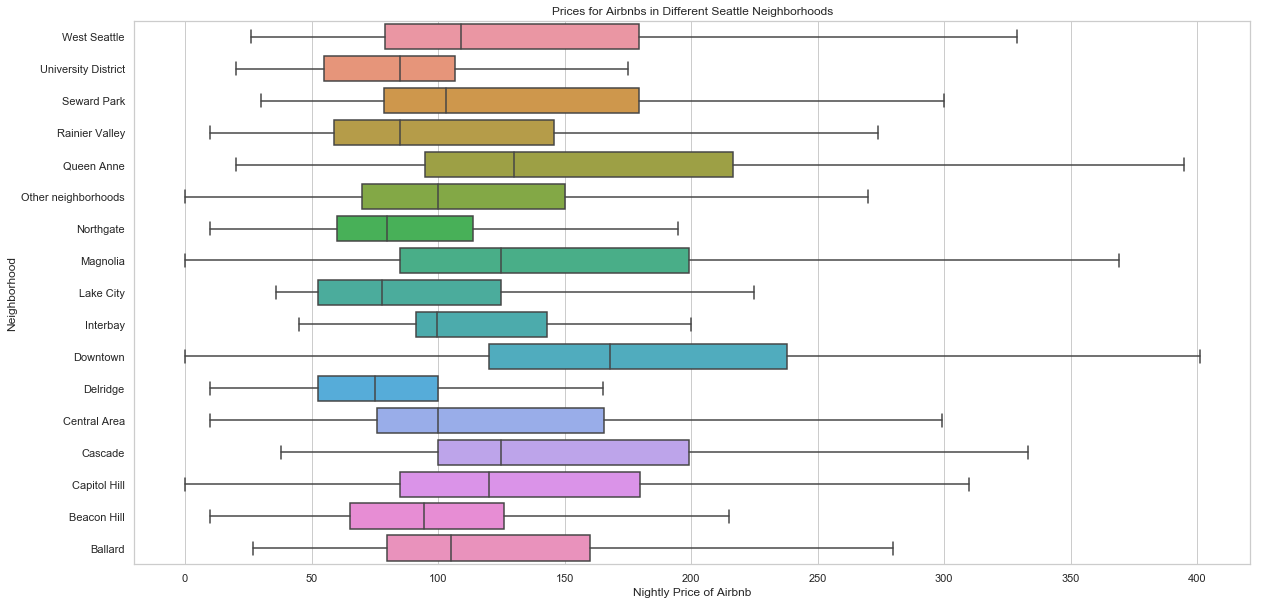

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
my_order = df.groupby(by=["neighbourhood_group_cleansed"])["price"].median().iloc[::-1].index
sns.boxplot(x="price", y="neighbourhood_group_cleansed", data=df, ax = ax, showfliers=False, order = my_order)
ax.set_title('Prices for Airbnbs in Different Seattle Neighborhoods')
ax.set_ylabel('Neighborhood')
ax.set_xlabel('Nightly Price of Airbnb')
plt.show()
# fig.savefig('img/neighborhoodprice.png')

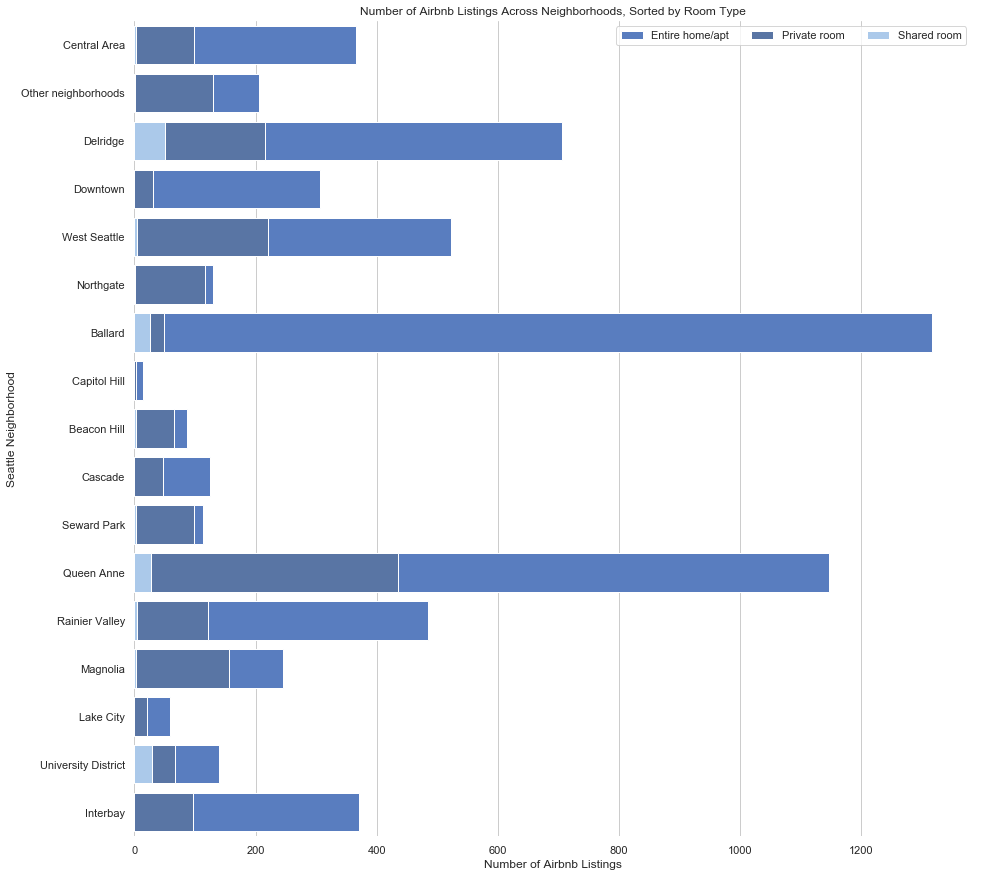

In [8]:
room_sorted = pd.DataFrame({
    'neighborhood': df['neighbourhood_group_cleansed'].unique(),
    'total_listings': df.groupby('neighbourhood_group_cleansed')['room_type'].count(),
    'entire_home': df[df['room_type'] == 'Entire home/apt'].groupby('neighbourhood_group_cleansed')['room_type'].count(),
    'private_rm': df[df['room_type'] == 'Private room'].groupby('neighbourhood_group_cleansed')['room_type'].count(),
    'shared_rm': df[df['room_type'] == 'Shared room'].groupby('neighbourhood_group_cleansed')['room_type'].count()
})

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 15))

sns.set_color_codes("muted")
sns.barplot(x="entire_home", y="neighborhood", data=room_sorted,
            label="Entire home/apt", color="b")

sns.set_color_codes("deep")
sns.barplot(x="private_rm", y="neighborhood", data=room_sorted,
            label="Private room", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="shared_rm", y="neighborhood", data=room_sorted,
            label="Shared room", color="b")

ax.legend(ncol=4, loc="upper right", frameon=True)
ax.set(ylabel="Seattle Neighborhood",
       xlabel="Number of Airbnb Listings",
       title="Number of Airbnb Listings Across Neighborhoods, Sorted by Room Type")
sns.despine(left=True, bottom=True)

# plt.savefig("img/neighborhoodroomtype.png")

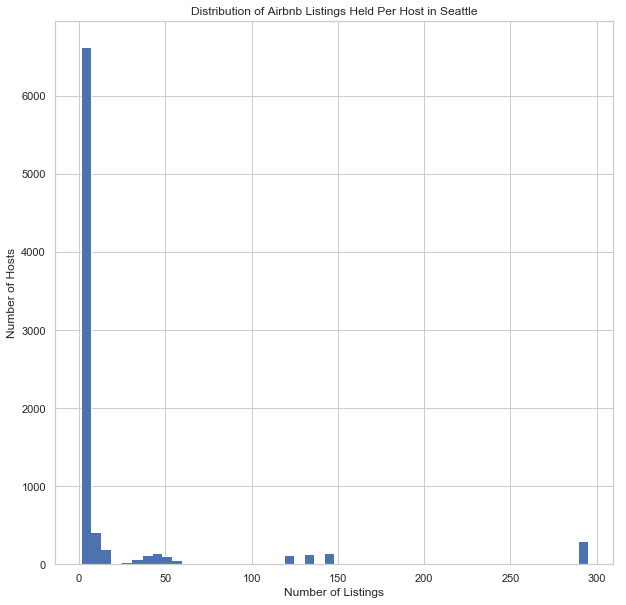

In [16]:
plt.figure(figsize=[10, 10])
plt.hist(df['calculated_host_listings_count'], bins = 50, histtype = 'stepfilled')
plt.title('Distribution of Airbnb Listings Held Per Host in Seattle')
plt.xlabel('Number of Listings')
plt.ylabel('Number of Hosts')
# plt.savefig("img/listingsperhost.png")
plt.show()

In [12]:
multi_listings = pd.DataFrame({
    'host_name': df.groupby('host_id')['host_name'].first(),
    'host_listings': df.groupby('host_id')['calculated_host_listings_count'].first()
})
 
multi = multi_listings[multi_listings['host_listings'] > 1].sum()
not_multi = multi_listings[multi_listings['host_listings'] == 1].sum()

In [13]:
multi_listings.sort_values(by='host_listings', ascending=False).head(20)

,host_name,host_listings
host_id,,
8534462,Corp Condos & Apts,295
50550045,Seattle Stays,146
82961680,Addison,131
26967583,Dario,121
1243056,Andy,57
3074414,Melissa,51
138924514,Sea To Sky,49
4962900,Stay Alfred,46
4124418,Ash,46


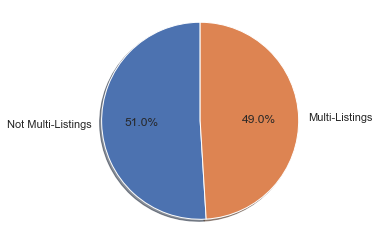

In [15]:
fig1, ax1 = plt.subplots()
ax1.pie([not_multi['host_listings'], multi['host_listings']], labels=['Not Multi-Listings', 'Multi-Listings'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()
# fig1.savefig("img/multilistings.png")

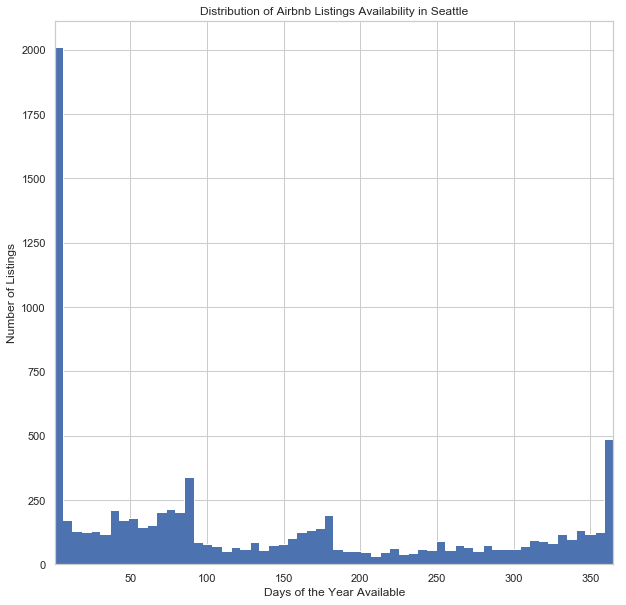

In [50]:
fig, ax = plt.subplots(figsize=[10, 10])
plt.hist(df['availability_365'], bins = 60, histtype = 'stepfilled')
plt.title('Distribution of Airbnb Listings Availability in Seattle')
plt.xlabel('Days of the Year Available')
plt.ylabel('Number of Listings')
ax.set_xlim(1, 365)
# plt.savefig("img/listingsperhost.png")
plt.show()


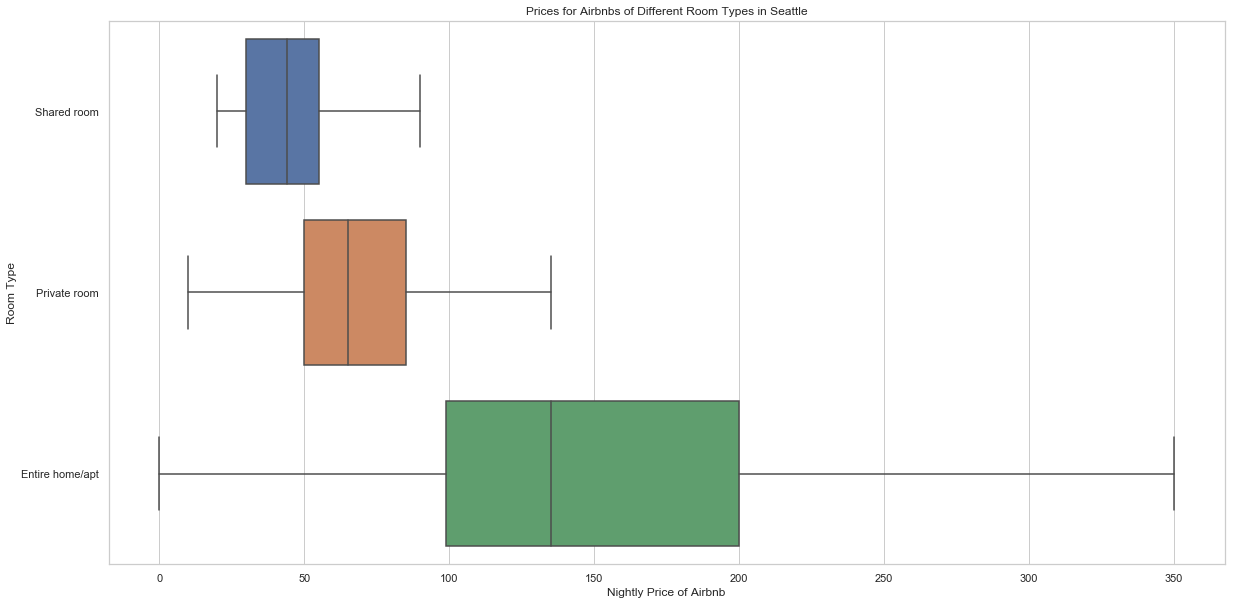

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
my_order = df.groupby(by=["room_type"])["price"].median().iloc[::-1].index
sns.boxplot(x="price", y="room_type", data=df, ax = ax, showfliers=False, order = my_order)
ax.set_title('Prices for Airbnbs of Different Room Types in Seattle')
ax.set_ylabel('Room Type')
ax.set_xlabel('Nightly Price of Airbnb')
plt.show()
fig.savefig('img/roomtypeprice.png')

(array([1923., 1093.,  734.,  607.,  528.,  450.,  370.,  376.,  311.,
        1113.]),
 array([  1. ,  37.4,  73.8, 110.2, 146.6, 183. , 219.4, 255.8, 292.2,
        328.6, 365. ]),
 <a list of 10 Patch objects>)

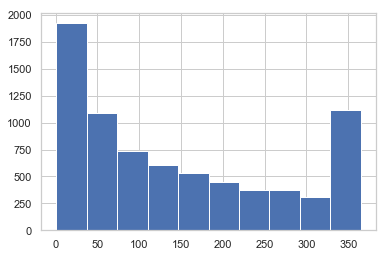

In [76]:
df['nights_per_year'] = round(df['reviews_per_month'] * 2 * 3 * 12)
df.loc[df['nights_per_year'] > 365, 'nights_per_year'] = 365
plt.hist(df['nights_per_year'])

In [74]:
df['occupancy_rate'] = round(df['nights_per_year'] / 365 * 100)
df.loc[df['occupancy_rate'] > 70, 'occupancy_rate'] = 70

(array([1324.,  985.,  724.,  517.,  459.,  412.,  387.,  315.,  316.,
        2066.]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 <a list of 10 Patch objects>)

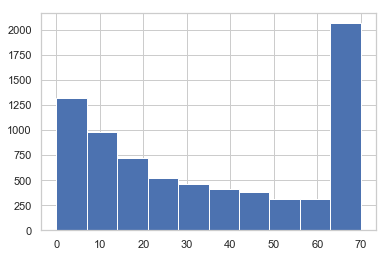

In [75]:
plt.hist(df['occupancy_rate'])

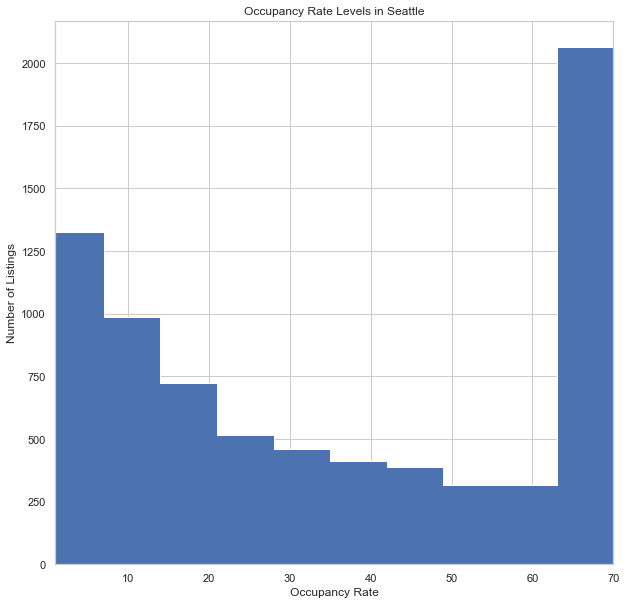

In [79]:
fig, ax = plt.subplots(figsize=[10, 10])
plt.hist(df['occupancy_rate'], histtype = 'stepfilled')
plt.title('Occupancy Rate Levels in Seattle')
plt.xlabel('Occupancy Rate')
plt.ylabel('Number of Listings')
ax.set_xlim(1, 70)
plt.savefig("img/occupancyrate.png")
plt.show()

In [81]:
df[['host_name', 'neighbourhood_group_cleansed', 'price', 'room_type', 'calculated_host_listings_count', 'availability_365', 'nights_per_year', 'occupancy_rate']].head()

,host_name,neighbourhood_group_cleansed,price,room_type,calculated_host_listings_count,availability_365,nights_per_year,occupancy_rate
id,,,,,,,,
2318,Megan,Central Area,296.0,Entire home/apt,1,343,12.0,3.0
4291,Jess & Joey,Other neighborhoods,82.0,Private room,5,365,66.0,18.0
5682,Maddy,Delridge,48.0,Entire home/apt,1,0,307.0,70.0
6606,Joyce,Other neighborhoods,90.0,Entire home/apt,3,364,83.0,23.0
9419,Angielena,Other neighborhoods,65.0,Private room,7,344,91.0,25.0
